In [49]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [50]:
wine=pd.read_csv('WineQT.csv')
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,3
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,4


In [51]:
wine.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality', 'Id'],
      dtype='object')

In [52]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1143 non-null   float64
 1   volatile acidity      1143 non-null   float64
 2   citric acid           1143 non-null   float64
 3   residual sugar        1143 non-null   float64
 4   chlorides             1143 non-null   float64
 5   free sulfur dioxide   1143 non-null   float64
 6   total sulfur dioxide  1143 non-null   float64
 7   density               1143 non-null   float64
 8   pH                    1143 non-null   float64
 9   sulphates             1143 non-null   float64
 10  alcohol               1143 non-null   float64
 11  quality               1143 non-null   int64  
 12  Id                    1143 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 116.2 KB


In [53]:
wine.describe

<bound method NDFrame.describe of       fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.4             0.700         0.00             1.9      0.076   
1               7.8             0.880         0.00             2.6      0.098   
2               7.8             0.760         0.04             2.3      0.092   
3              11.2             0.280         0.56             1.9      0.075   
4               7.4             0.700         0.00             1.9      0.076   
...             ...               ...          ...             ...        ...   
1138            6.3             0.510         0.13             2.3      0.076   
1139            6.8             0.620         0.08             1.9      0.068   
1140            6.2             0.600         0.08             2.0      0.090   
1141            5.9             0.550         0.10             2.2      0.062   
1142            5.9             0.645         0.12             2.0      0.0

In [54]:
wine.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
Id                      0
dtype: int64

In [55]:
wine.duplicated().sum()

np.int64(0)

In [56]:
wine.nunique()

fixed acidity             91
volatile acidity         135
citric acid               77
residual sugar            80
chlorides                131
free sulfur dioxide       53
total sulfur dioxide     138
density                  388
pH                        87
sulphates                 89
alcohol                   61
quality                    6
Id                      1143
dtype: int64

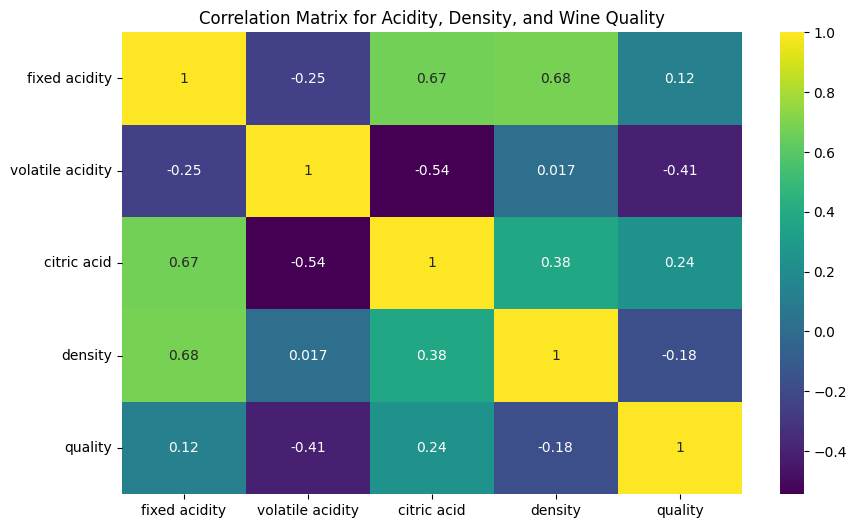

In [57]:
corr_matrix = wine[['fixed acidity', 'volatile acidity', 'citric acid', 'density', 'quality']].corr()
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap='viridis')
plt.title("Correlation Matrix for Acidity, Density, and Wine Quality")
plt.show()

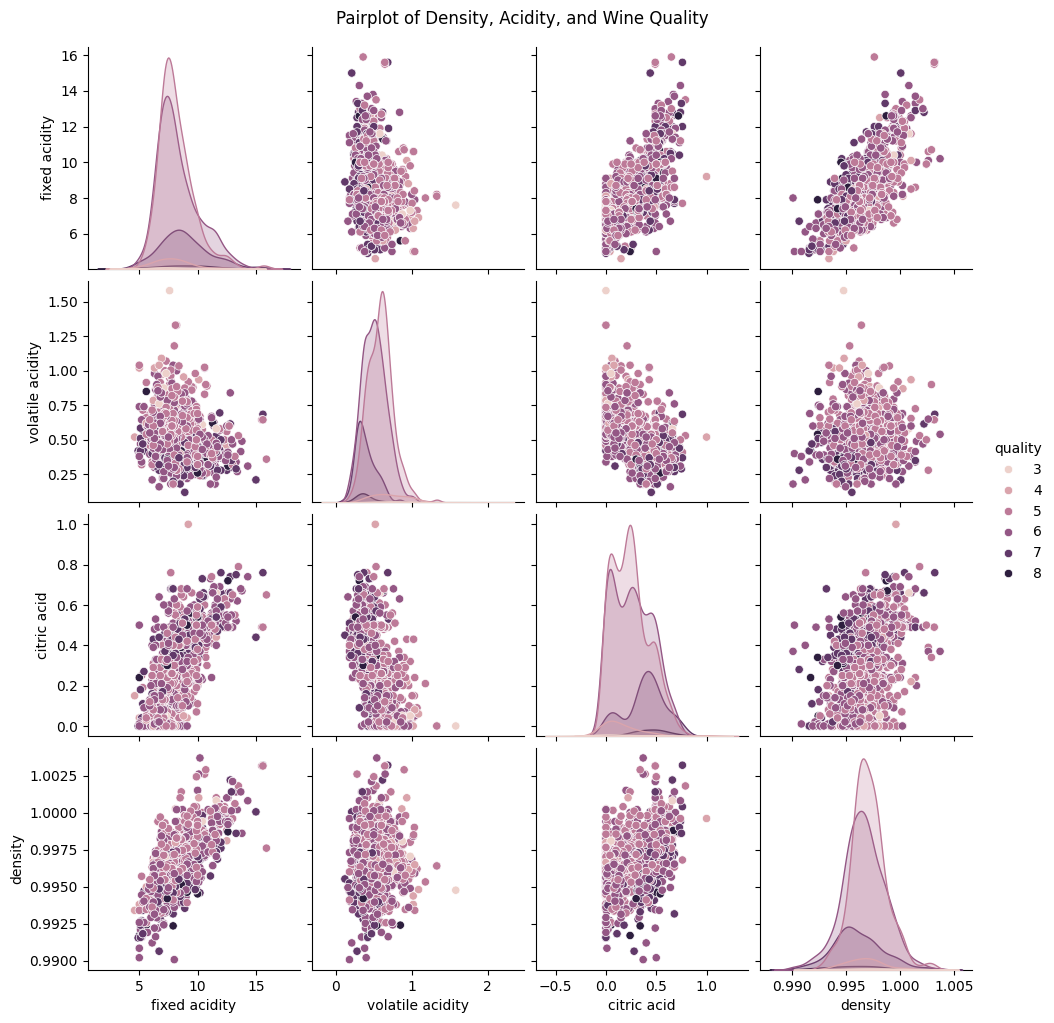

In [58]:
sns.pairplot(wine[['fixed acidity', 'volatile acidity', 'citric acid', 'density', 'quality']], hue='quality')
plt.suptitle("Pairplot of Density, Acidity, and Wine Quality", y=1.02)
plt.show()

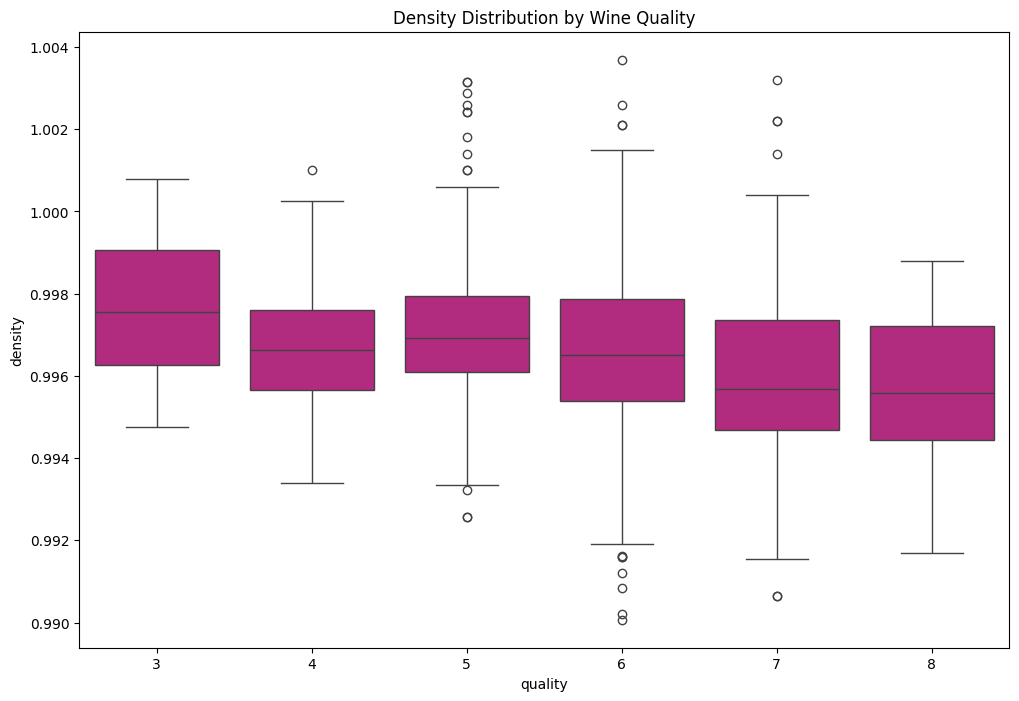

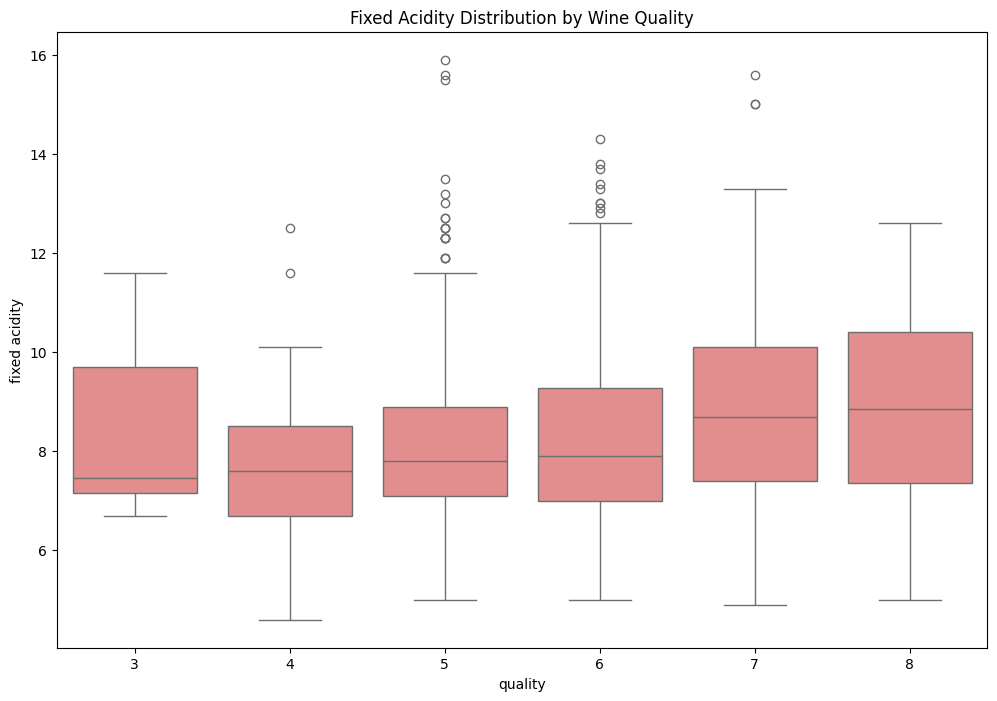

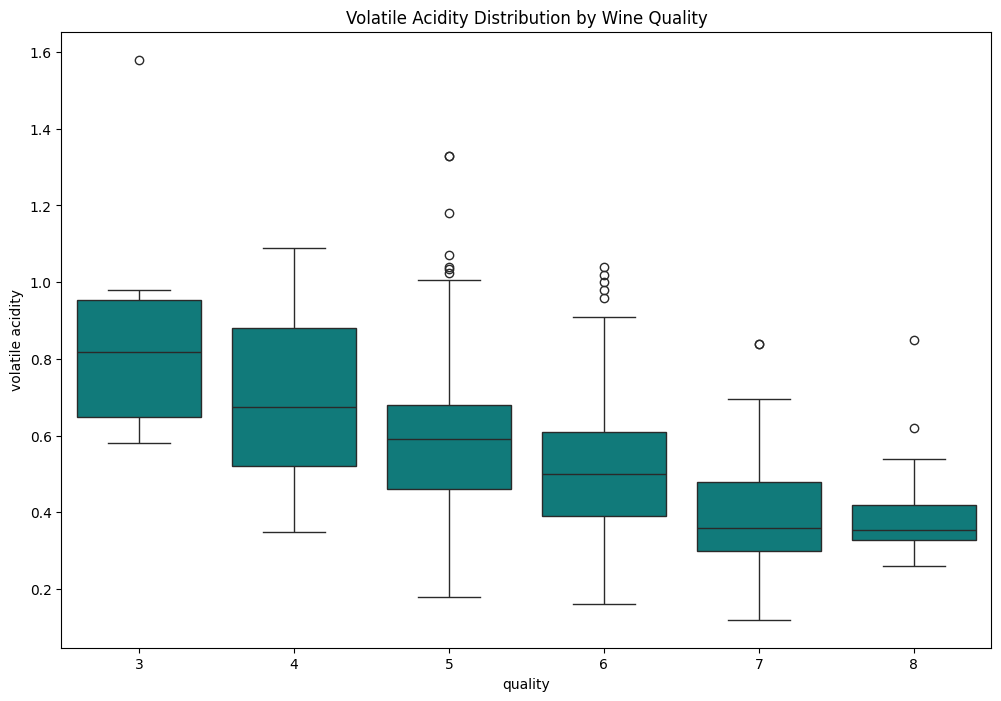

In [59]:
plt.figure(figsize=(12, 8))
sns.boxplot(x='quality', y='density', data=wine, color='#C71585')
plt.title("Density Distribution by Wine Quality")
plt.show()

plt.figure(figsize=(12, 8))
sns.boxplot(x='quality', y='fixed acidity', data=wine,color='#F08080')
plt.title("Fixed Acidity Distribution by Wine Quality")
plt.show()

plt.figure(figsize=(12, 8))
sns.boxplot(x='quality', y='volatile acidity', data=wine,color='#008B8B')
plt.title("Volatile Acidity Distribution by Wine Quality")
plt.show()

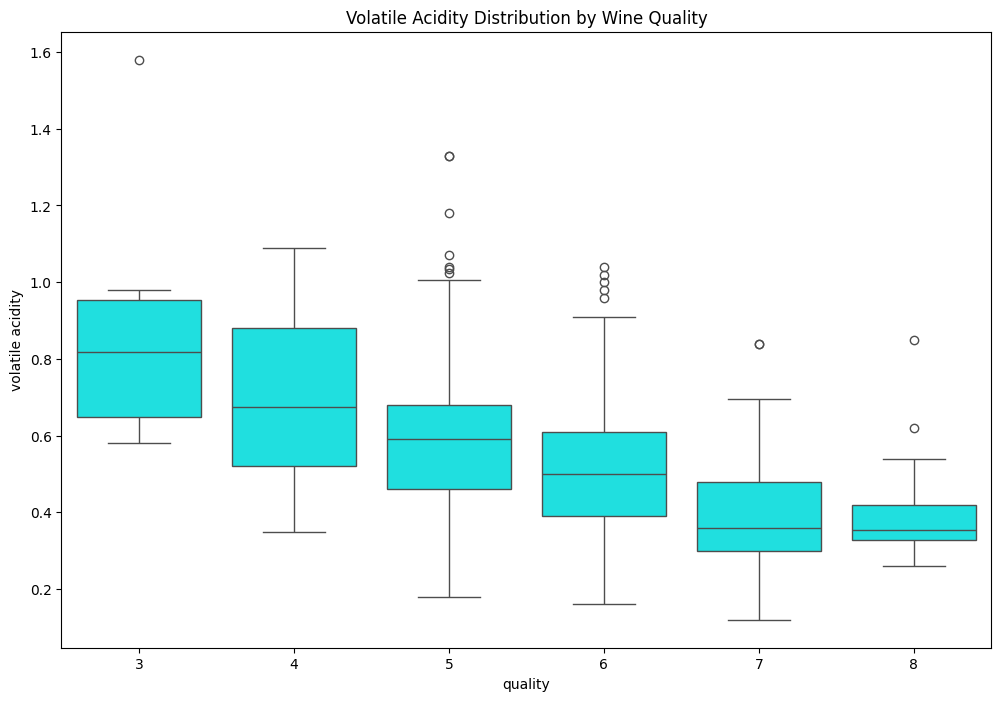

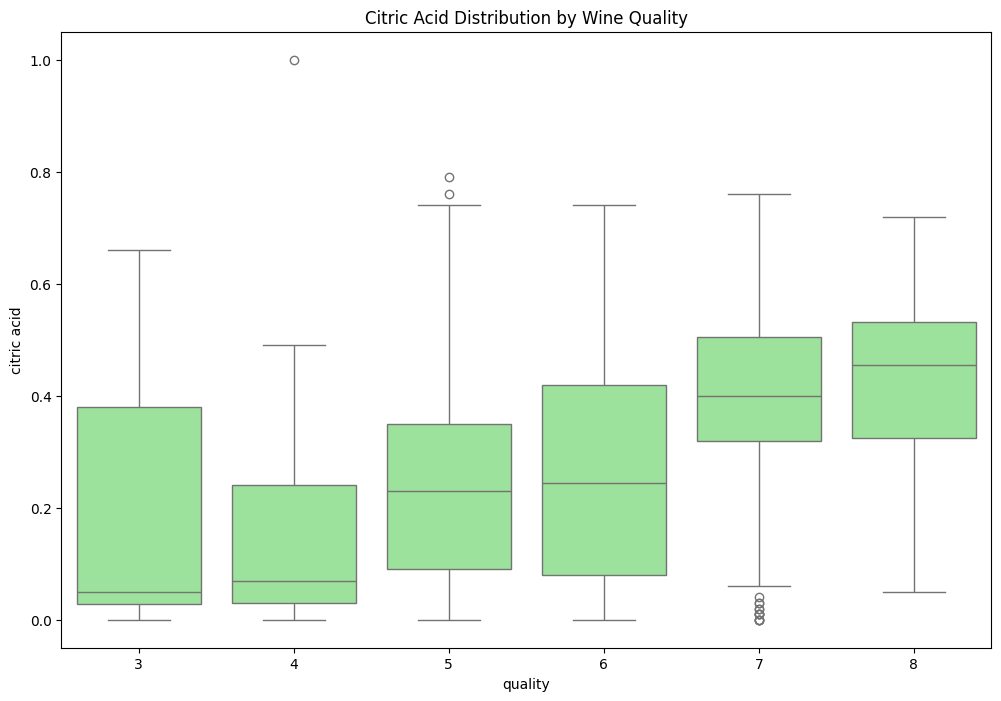

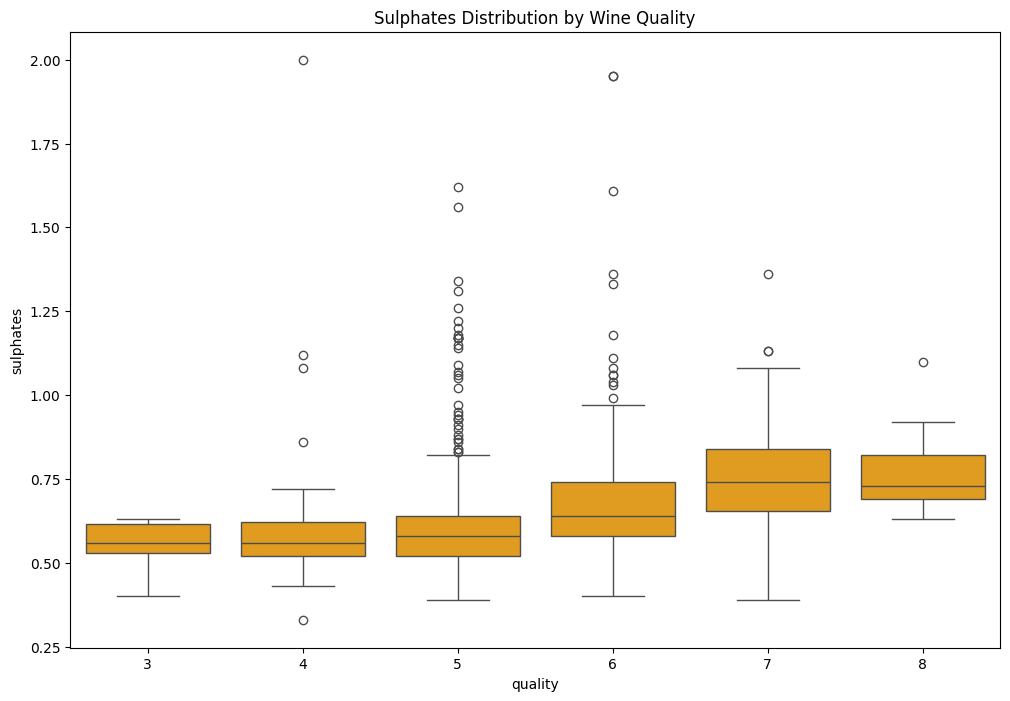

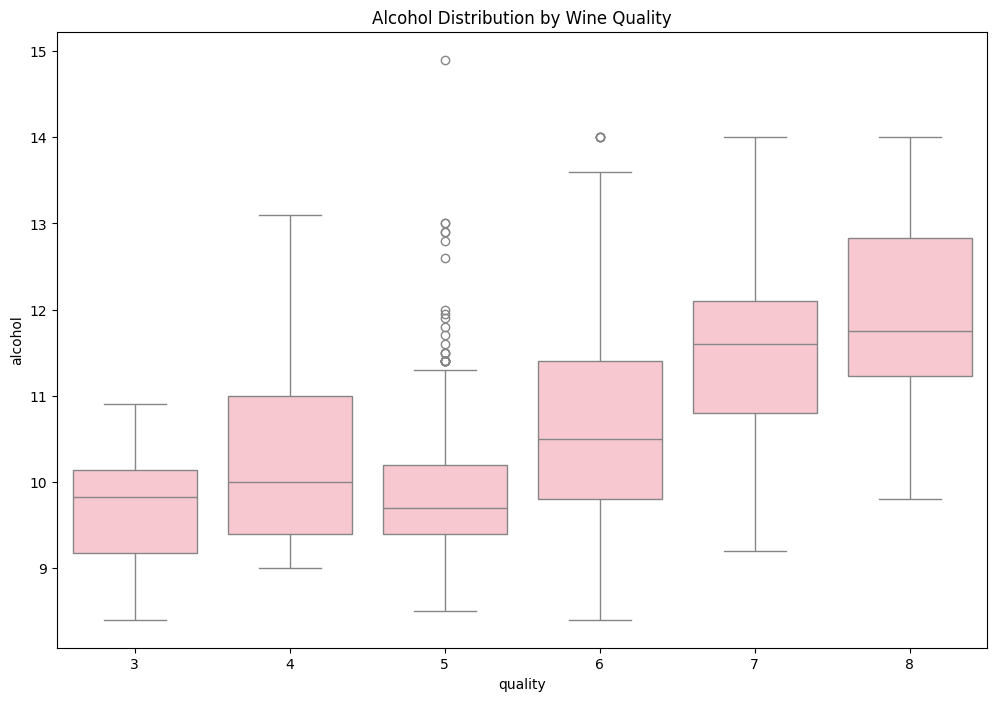

In [60]:
plt.figure(figsize=(12, 8))
sns.boxplot(x='quality', y='volatile acidity', data=wine, color='cyan')
plt.title("Volatile Acidity Distribution by Wine Quality")
plt.show()

plt.figure(figsize=(12, 8))
sns.boxplot(x='quality', y='citric acid', data=wine, color='lightgreen')
plt.title("Citric Acid Distribution by Wine Quality")
plt.show()

plt.figure(figsize=(12, 8))
sns.boxplot(x='quality', y='sulphates', data=wine, color='orange')
plt.title("Sulphates Distribution by Wine Quality")
plt.show
plt.figure(figsize=(12, 8))
sns.boxplot(x='quality', y='alcohol', data=wine, color='pink')
plt.title("Alcohol Distribution by Wine Quality")
plt.show()

In [61]:
wine['total_acidity'] = wine['fixed acidity'] + wine['volatile acidity'] + wine['citric acid']

In [62]:
wine['density_alcohol_interaction'] = wine['density'] * wine['alcohol']

In [63]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report,confusion_matrix

In [64]:
X=wine.drop(['quality', 'Id'], axis=1)
y=wine['quality']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [65]:
rf_model =RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf =rf_model.predict(X_test)

In [66]:
sgd_model = SGDClassifier(random_state=42)
sgd_model.fit(X_train, y_train)
y_pred_sgd=sgd_model.predict(X_test)

In [67]:
svc_model=SVC(random_state = 42)
svc_model.fit(X_train, y_train)
y_pred_svc = svc_model.predict(X_test)

In [68]:
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print("SGD Classifier Accuracy:", accuracy_score(y_test, y_pred_sgd))
print("SVC Accuracy:", accuracy_score(y_test, y_pred_svc))

Random Forest Accuracy: 0.6384839650145773
SGD Classifier Accuracy: 0.37317784256559766
SVC Accuracy: 0.5364431486880467


In [69]:
print("\nRandom Forest Classification Report:\n", classification_report(y_test, y_pred_rf))
print("SGD Classifier Classification Report:\n", classification_report(y_test, y_pred_sgd))
print("SVC Classification Report:\n", classification_report(y_test, y_pred_svc))




Random Forest Classification Report:
               precision    recall  f1-score   support

           4       0.00      0.00      0.00         9
           5       0.67      0.77      0.71       143
           6       0.62      0.61      0.61       146
           7       0.58      0.46      0.51        41
           8       1.00      0.25      0.40         4

    accuracy                           0.64       343
   macro avg       0.57      0.42      0.45       343
weighted avg       0.62      0.64      0.63       343

SGD Classifier Classification Report:
               precision    recall  f1-score   support

           4       0.14      0.11      0.12         9
           5       0.69      0.57      0.62       143
           6       0.35      0.08      0.12       146
           7       0.19      0.85      0.31        41
           8       0.00      0.00      0.00         4

    accuracy                           0.37       343
   macro avg       0.28      0.32      0.24       343

c:\Users\bithi\OneDrive\Desktop\OASIS\myenv\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\bithi\OneDrive\Desktop\OASIS\myenv\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\bithi\OneDrive\Desktop\OASIS\myenv\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} i

In [70]:
print("\nRandom Forest Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))
print("SGD Classifier Confusion Matrix:\n", confusion_matrix(y_test, y_pred_sgd))
print("SVC Confusion Matrix:\n", confusion_matrix(y_test, y_pred_svc))


Random Forest Confusion Matrix:
 [[  0   6   3   0   0]
 [  0 110  28   5   0]
 [  0  48  89   9   0]
 [  0   1  21  19   0]
 [  0   0   3   0   1]]
SGD Classifier Confusion Matrix:
 [[  1   3   3   2   0]
 [  5  81  16  41   0]
 [  1  28  11 106   0]
 [  0   5   1  35   0]
 [  0   0   0   4   0]]
SVC Confusion Matrix:
 [[  0   2   7   0   0]
 [  0  60  83   0   0]
 [  0  22 124   0   0]
 [  0   6  35   0   0]
 [  0   0   4   0   0]]


In [71]:
from sklearn.model_selection import GridSearchCV
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10]
}

grid_rf = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=5)
grid_rf.fit(X_train, y_train)
print("Best parameters for Random Forest:", grid_rf.best_params_)

Best parameters for Random Forest: {'max_depth': 10, 'min_samples_split': 2, 'n_estimators': 50}


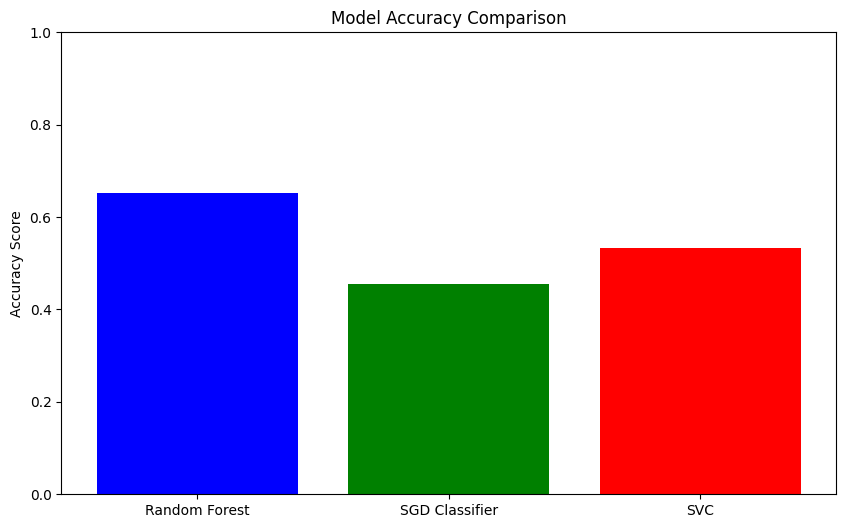

In [72]:
accuracy_scores = {
    'Random Forest': 0.653,
    'SGD Classifier': 0.455,
    'SVC': 0.534
}
plt.figure(figsize=(10, 6))
plt.bar(accuracy_scores.keys(), accuracy_scores.values(), color=['blue', 'green', 'red'])
plt.ylim(0, 1)
plt.ylabel('Accuracy Score')
plt.title('Model Accuracy Comparison')
plt.show()

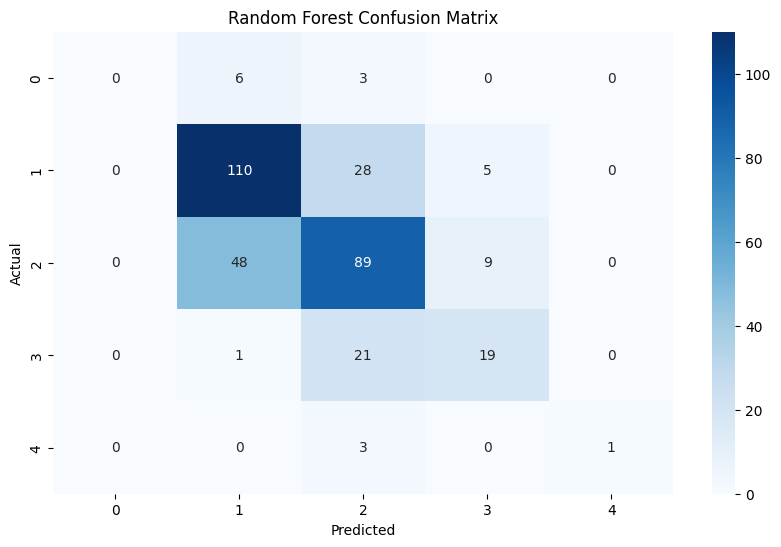

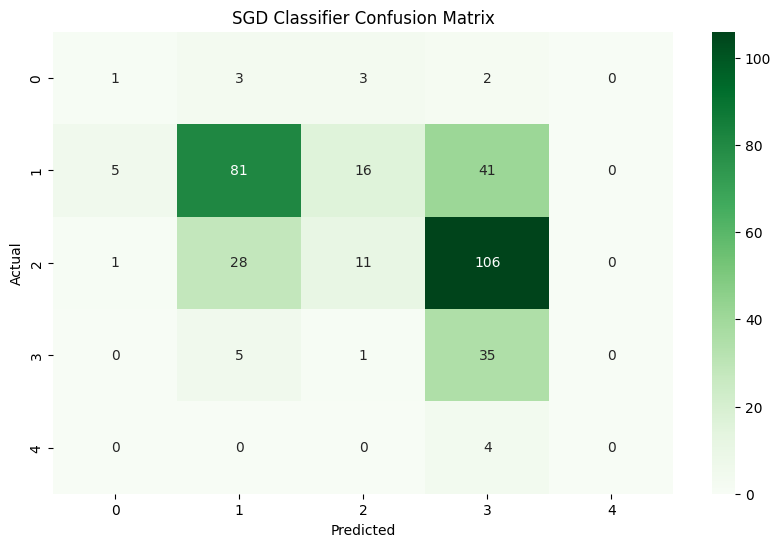

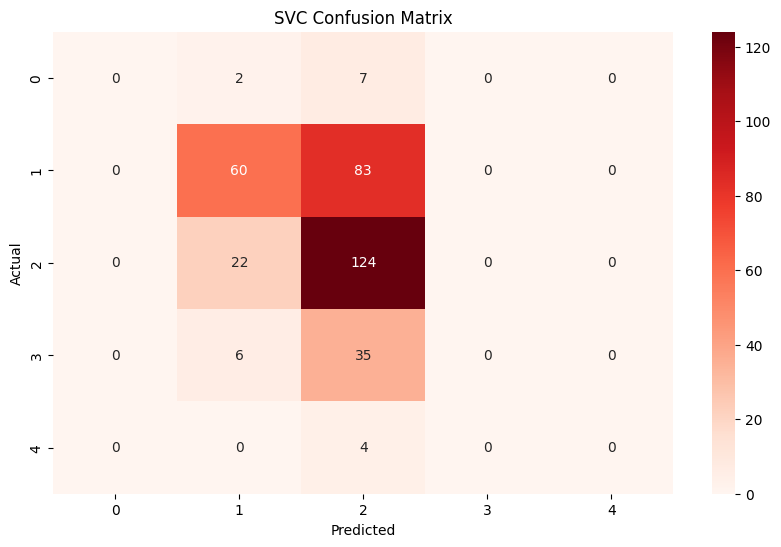

In [73]:
plt.figure(figsize=(10, 6))
rf_cm = confusion_matrix(y_test, y_pred_rf)
sns.heatmap(rf_cm, annot=True, fmt='d', cmap='Blues')
plt.title('Random Forest Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

plt.figure(figsize=(10, 6))
sgd_cm = confusion_matrix(y_test, y_pred_sgd)
sns.heatmap(sgd_cm, annot=True, fmt='d', cmap='Greens')
plt.title('SGD Classifier Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# SVC Confusion Matrix
plt.figure(figsize=(10, 6))
svc_cm = confusion_matrix(y_test, y_pred_svc)
sns.heatmap(svc_cm, annot=True, fmt='d', cmap='Reds')
plt.title('SVC Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()